<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/projeto_fake_news_1_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualização dos dados**



In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Projeto - fake news/fakeNews _temp3.json')

In [ ]:
data_df.head(2)

,claim_datetime,claim_first,review_resume,review_datetime,review_title,review_conclusion,news_keyword,news_countries,claims_total,news_type,news_url,news_url_archive,news_part,review_start_time,review_end_time,news_org_location,news_org,news_logo_type,news_logo_url,news_language,news_language_code
0,2019-12-13T00:00:00+00:00,/news_articles/598,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,"[Abandoned Ukraine, Angela Merkel, Emmanuel Ma...","[Russia, Ukraine, The West, EU, Germany, France]","[/claims/75, /claims/79, /claims/80, /claims/8...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,Belarus,sputnik.by // lifenews.ru,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,Russian,rus
1,2019-09-26T00:00:00+00:00,/news_articles/1835,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,"[Conspiracy, Terrorism, Donald Trump]","[Iran, United States, Saudi Arabia]","[/claims/934, /claims/941, /claims/942, /claim...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,https://web.archive.org/web/20190927121413/htt...,None,NaN,NaN,None,southfront.org,None,None,English,eng


##**Palavras mais citadas**

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
import nltk 
from nltk.corpus import stopwords 
import json
import re
from string import punctuation
from unicodedata import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

**Função que plota a word cloud**

In [ ]:
def print_words(list_col):
  
  text_string = " ".join(list_col).lower()
  stop_words = STOPWORDS
  word_cloud = WordCloud(stopwords = stop_words, 
                      background_color = "white",
                      collocations=False,
                      width = 1000, height = 500).generate(text_string)

  plt.figure(figsize=(15,8))
  plt.imshow(word_cloud)
  plt.axis("off")
  return plt.show()

**Função que plota gráfico de barras**

In [ ]:
def plot_grafic(df_col):

  #contar as aparições repetidas
  countries_dict = Counter(df_col)
  sorted(countries_dict, key=countries_dict.get)
  countries_dict
  df = pd.DataFrame.from_dict(countries_dict, orient='index')
  df.rename(columns={0: 'Count'}, inplace = True)
  df.index.name = 'Countries'
  df_count_names = df.nlargest(10, 'Count')

  #separar os valores dos eixos do gráfico
  val_num = df_count_names['Count']
  val_name = df_count_names.index

  #construir e plotar o gráfico
  plt.figure(figsize = (12,7))
  plt.barh(val_name, val_num, align='center',color='salmon', edgecolor = 'salmon')
  plt.legend(labels = ['Quantidade mais recorrente'])
  plt.title("FAKE NEWS")
  plt.xlabel('Numbers')
  plt.ylabel('Names')

  return plt.show()

**Função que remove stopwords**

In [ ]:
def remove_stopword(df, df_col):

  df_preprocess = pd.DataFrame()

  #Retirando acentuação e transformando em minúsculo
  normalized_list = []

  for item in df[df_col]:
    norm = unicodedata.normalize('NFKD', item).encode('ASCII', 'ignore').decode('ASCII')
    normalized_list.append(norm.lower())

  df_preprocess['normalized'] = normalized_list


  #Tokenizando a coluna
  df_preprocess['token'] = df_preprocess.apply(lambda row: nltk.word_tokenize(row['normalized']), axis=1)

  #Criando lista de stop words
  stopwords = nltk.corpus.stopwords.words('english')
  stopwords = list(set(stopwords))
  stopwords = stopwords + list(punctuation)

  #Retirando as stopwords
  words_lists = []

  for lists in df_preprocess['token']:
    word_temp = []
    words_lists.append(word_temp)
    for word in lists:
      if word not in stopwords:
        word_temp.append(word)

  df_preprocess['stop_words'] = words_lists

  #Retirando expressões regulares
  cleam_words = []

  for lists in df_preprocess['stop_words']:
    word_temp = []
    cleam_words.append(word_temp)
    for word in lists:
      new_word = re.sub(r'[^\w\a]',"", word)
      if new_word != "":
        word_temp.append(new_word)

  df_preprocess['cleam_words'] = cleam_words


  return df_preprocess['cleam_words']

###**Palavras chaves mais citadas nas notícias originais**

In [ ]:
keyword_list = list(chain(*data_df['news_keyword']))

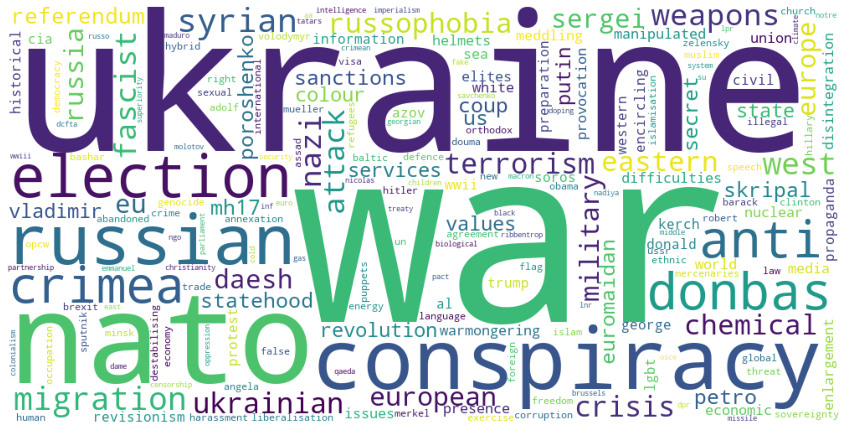

In [ ]:
print_words(keyword_list)

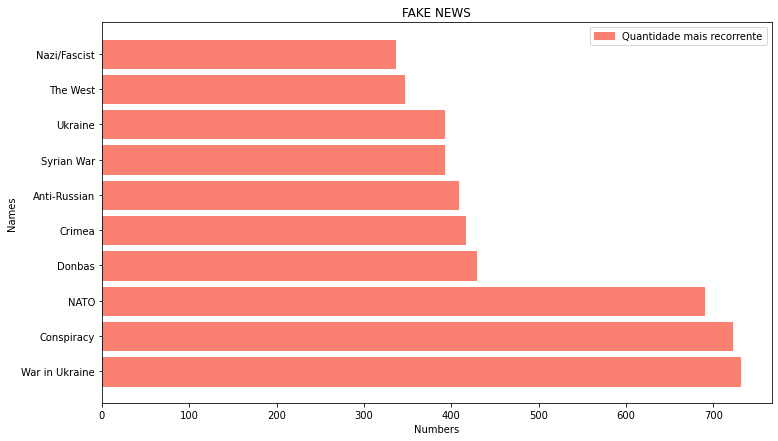

In [ ]:
plot_grafic(keyword_list)

### **Países mais citados nas notícias originais**

In [ ]:
countries_list = list(chain(*data_df['news_countries']))

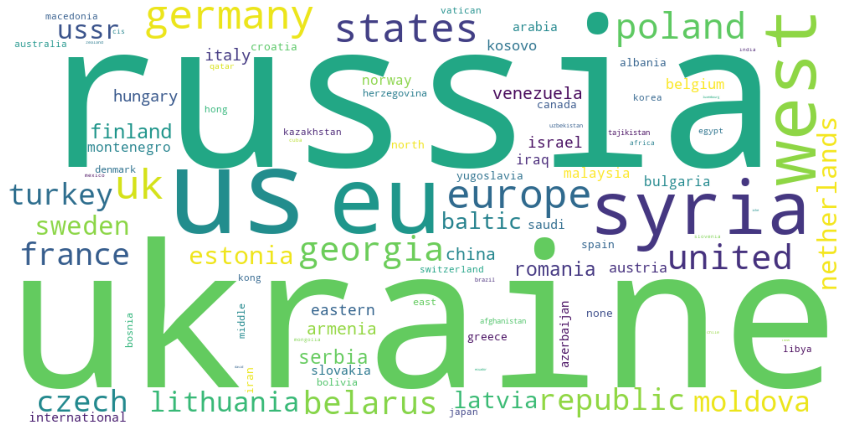

In [ ]:
print_words(countries_list)

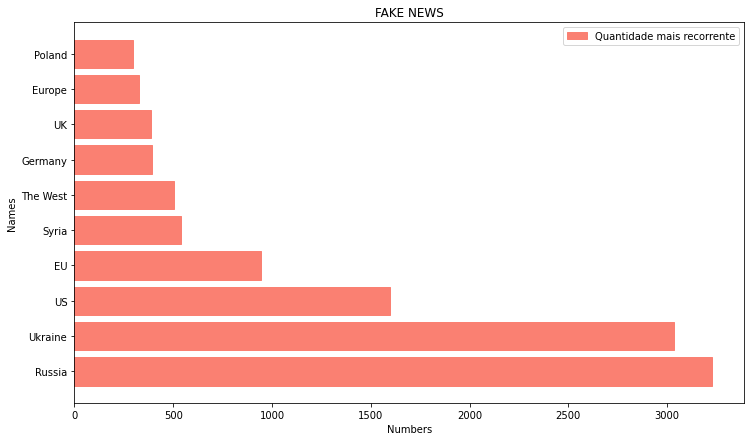

In [ ]:
plot_grafic(countries_list)

###**Palavras mais citadas nos TÍTULOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
title_temp = remove_stopword(data_df, 'review_title')

In [ ]:
title_list = list(chain(*title_temp))

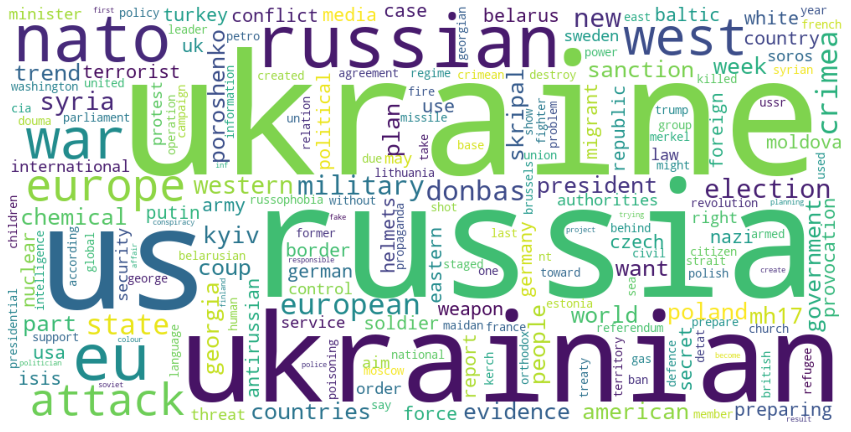

In [ ]:
print_words(title_list)

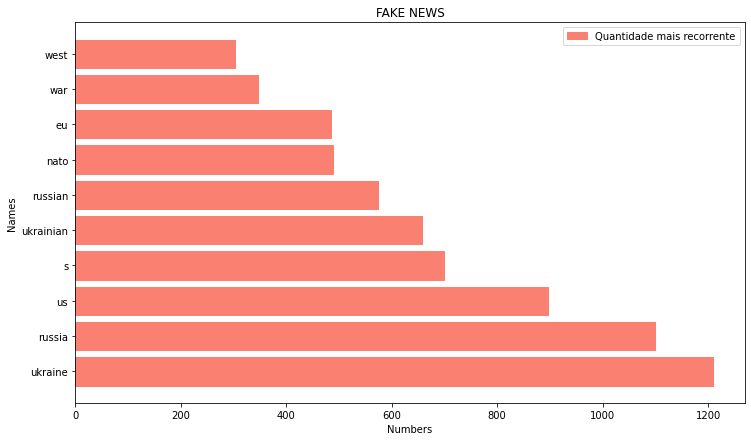

In [ ]:
plot_grafic(title_list)

###**Palavras mais citadas nos RESUMOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
resume_list = list(chain(data_df['review_resume']))

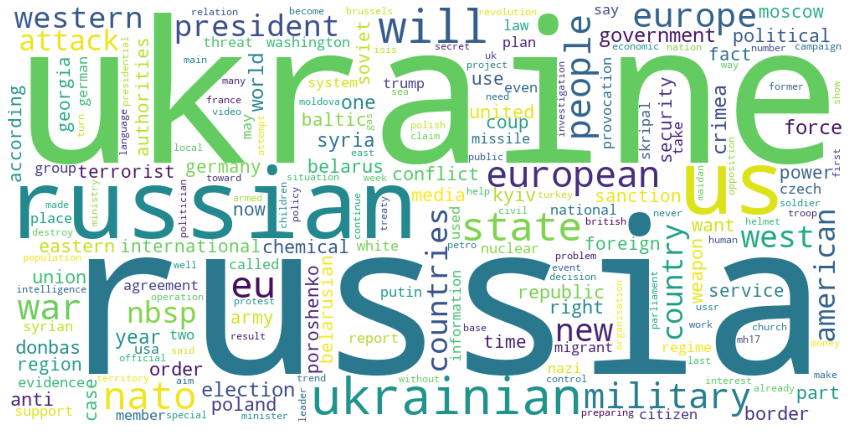

In [ ]:
print_words(resume_list)

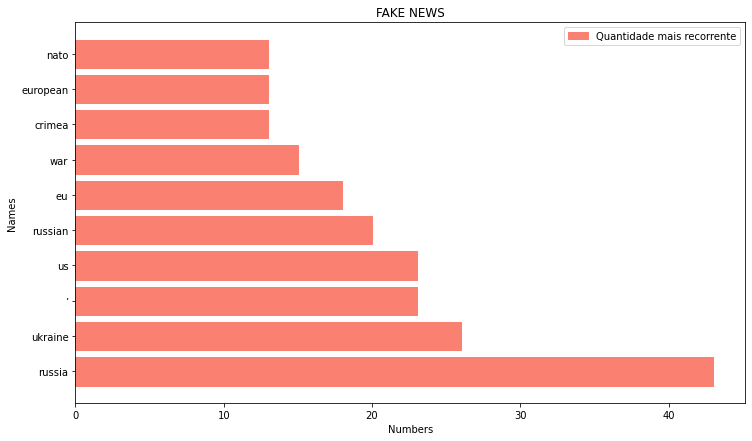

In [ ]:
clean_data = remove_stopwords(resume_list)
plot_grafic(clean_data)

###**Palavras mais citadas nas CONCLUSÕES das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
conclusion_list = list(chain(data_df['review_conclusion']))

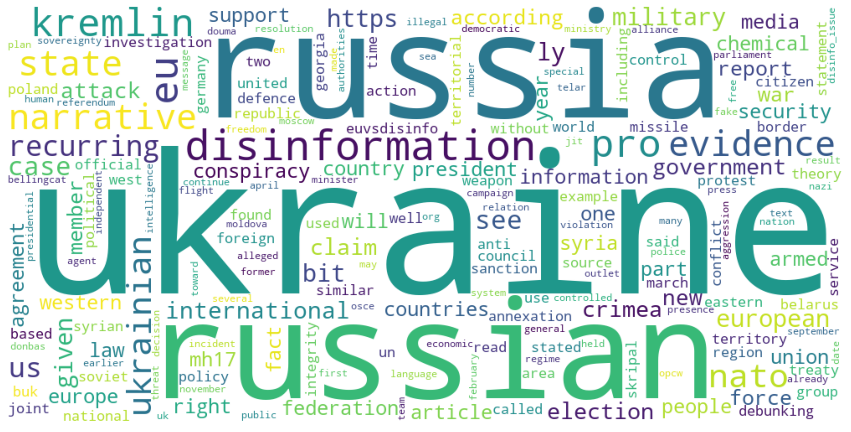

In [ ]:
print_words(conclusion_list)

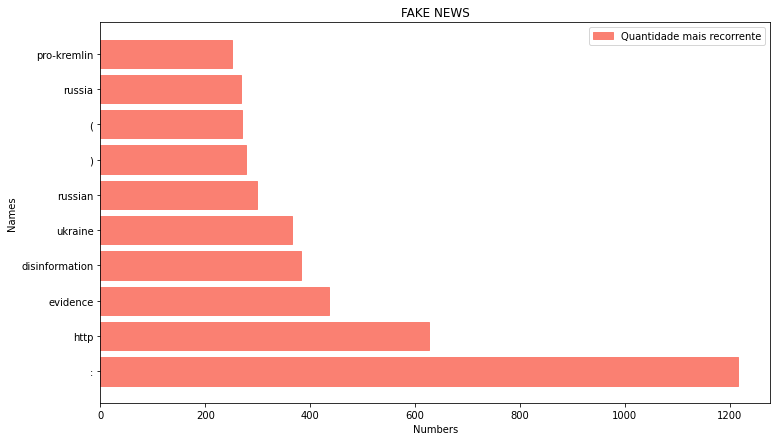

In [ ]:
clean_data = remove_stopwords(conclusion_list)
plot_grafic(clean_data)